<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 3



I will continue to use the error computing functions defined in project part 1 and 2 as well as the Lagrange Interpolation

In [1]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def absoluteError(estimate, actualValue):
  return actualValue - estimate

def relativeError(estimate, actualValue):
  return absoluteError(estimate, actualValue)/actualValue

def approximateError(previousEstimate, currentEstimate):
  return currentEstimate - previousEstimate

def relativeApproximateError(previousEstimate, currentEstimate):
  return abs(approximateError(previousEstimate, currentEstimate)/currentEstimate)

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum



def lagrangeCoefficient(inputArray,outputArray,entry,variable):
  lc = 1
  for i in range(len(inputArray)):
    if i == entry:
      continue
    else:
      lc = lc*(variable - inputArray[i])/(inputArray[entry]-inputArray[i])
  return lc

def lagrangeInterpolator(inputArray, outputArray, variable):
  li = 0
  for i in range(len(inputArray)):
    li = li + lagrangeCoefficient(inputArray,outputArray,i,variable)*outputArray[i]
  return li

inputValues = [pi/4,pi/4+.1,pi/4+.2,pi/2]
outputValues = [math.sin(x) for x in inputValues]



## Newton-Rapshon Method

The Newton-Rapshon requires the symbolic knowledge of the first derivative.  Here I will be looking at the $\sin x$ function and we know it's derivative to be $\cos x$.

The process will be iterative with the first given and all next steps computed as
$$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$
We are looking for an $x$ where $\left|f(x)\right|<\epsilon$ but we need to watch out for the derivative being 0 and non-convergent sequences.

In [2]:
def newtonIterator(function, derivative, currentValue):
  return currentValue - function(currentValue)/derivative(currentValue)

def newton(function, derivative, initial, tolerrance, maxIterations):
  x = initial
  for counter in range(maxIterations):
    if derivative(x) == 0:
    #  print('Zero derivative, no solution')
      return None
    if abs(function(x))< tolerrance:
      return [x,counter]
    x = newtonIterator(function, derivative, x)
 # print('Max iterations exceeded')
  return None

In [3]:
newton(math.sin,math.cos,pi/4,.00001,20)


[-1.2602253593105295e-08, 3]

In [ ]:
newton(math.sin,math.cos,pi/2,.00001,20)

In [5]:
seedValues = [pi/4,pi/2,pi/4+.1,1,3,10,15,3*pi/2+.01,pi+.01]
roots = []
iterations = []
for seed in seedValues:
  if newton(math.sin,math.cos,seed,1e-10,20) != None:
    roots.append(newton(math.sin,math.cos,seed,1e-10,20)[0])
    iterations.append(newton(math.sin,math.cos,seed,1e-10,20)[1])
  else:
    roots.append('None Found')
    iterations.append('>20')


In order to make a beautiful table I am going to use the package plotly.  It is useful for creating visualizations.

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations']),
                 cells=dict(values = [seedValues,roots,iterations]))
                     ])
fig.show()

We see that at $\frac\pi2$ it does not converge.  Also interestingly $\frac{3\pi}2+0.1$ almost does not converge, but finds a root out at $33\pi$.  My impression is that that was luck.

In [ ]:
roots[-2]/pi

33.0

# Bisection Method

You are allowed to choose one of the methods here for the project.  Bisection is the easiest but requires two carefully chosen values, one returning a postive value and one returning a negative value.  Let's see if we can code it.

In [ ]:
def newValueBisection(xLarger, xSmaller):
  x = (xLarger+xSmaller)/2
  return x

def positive(function,xLarger,xSmaller):
  xNew = newValueBisection(xLarger,xSmaller)
  if function(xLarger)*function(xNew)< 0:
    return [xLarger, xNew]
  if function(xLarger)*function(xNew)>0:
    return [xNew,xSmaller]
  if function(xLarger)*function(xNew)==0:
    return [xNew,xNew]

def bisection(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x

Let's test it with $\sin x$ using a value that gives a negative and a positive.

In [ ]:
bisection(math.sin, 3*pi/2,pi/2+.1,300)

[3.1415926535897936, 3.141592653589793]

What would happen if I gave it two values that were positive to start?

In [ ]:
bisection(math.sin, pi/2,pi/4,20)

[0.7853989124115048, 0.7853981633974483]

That looks very much like the output above!  Let's see what it is giving me though!

In [ ]:
x = bisection(math.sin, pi/2,pi/4,20)
print(math.sin(pi/4))
math.sin(x[0])

0.7071067811865475


0.7071073108192677

My assumption is that this is a huge issue here.  Let's revise my method to check that you give it good values before you start!

In [ ]:
def bisection2(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  if function(initialLarger)*function(initialSmaller)>0:
    return 'Error!  Pick values that give opposite signs in the function'
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x

bisection2(math.sin, pi/2,pi/4,20)  

'Error!  Pick values that give opposite signs in the function'

In [ ]:
bisection2(math.sin, 3*pi/2,pi/2+.1,300)

[3.1415926535897936, 3.141592653589793]

There you go!  Works nicely and hopefully the error message could be interpreted by someone who gets it!

## Secant Method

This method requires two initial guesses but acts more like Newton Method than the Bisection method in that I do not need to be on both sides of the root.  We'll create the new value as

$$
x_{n+1}=x_i-\frac{f(x_i)\left(x_i-x_{i-1}\right)}{f(x_i)-f(x_{i-1})}
$$

Rather than just return a pair of values as before, I think I'll create a list of all the values that the method is giving.  This is an approach I could have done in the Newton Method too!

In [ ]:
def secant(function, olderValue, oldValue):
  x = oldValue - function(oldValue)*(oldValue - olderValue)/(function(oldValue)-function(olderValue))
  return x

def secantMethod(function, firstValue, secondValue, iterations):
  x = [firstValue, secondValue]
  for i in range(iterations):
    x.append(secant(function,x[-2],x[-1]))
  return x

In [ ]:
secantMethod(math.sin,pi/4,pi/2,5)

[0.7853981633974483,
 1.5707963267948966,
 -1.110720734539591,
 0.1565082041798571,
 -0.03127114958232252,
 0.0001023763531265709,
 -1.6632643497289565e-08]

In [ ]:
secantMethod(math.sin,pi/4,pi/2,8)#One more iteration will break the secant function

[0.7853981633974483,
 1.5707963267948966,
 -1.110720734539591,
 0.1565082041798571,
 -0.03127114958232252,
 0.0001023763531265709,
 -1.6632643497289565e-08,
 2.904950777806601e-17,
 0.0,
 0.0]

This code is sloppy!  You do not terminate when you start to get close to a root so you have to tweek the **iterations** number to not get too close...  At least I have another method with an alternative output.

##False Position and Lagrange Interpolation

I will do the false position algorithm, I'll spare most of the details of the algorithm but the new value to pick should be of the form
$$
x_n = \frac{x_U f(x_L)-x_L f(x_U)}{x_L-x_U}
$$

In [ ]:
def newValue(function, xLarger, xSmaller):
  x = (xLarger*function(xSmaller)-xSmaller*function(xLarger))/(function(xSmaller)-function(xLarger))
  return x

def positive(function,xLarger,xSmaller):
  xNew = newValue(function,xLarger,xSmaller)
  if function(xLarger)*function(xNew)< 0:
    return [xLarger, xNew]
  if function(xLarger)*function(xNew)>0:
    return [xNew,xSmaller]
  if function(xLarger)*function(xNew)==0:
    return [xNew,xNew]

def falsePosition(function, initialLarger, initialSmaller, maxIterations):
  x = [initialLarger,initialSmaller]
  for i in range(maxIterations):
    if x[0] == x[1]:
      return x[0]
    else:
      x = positive(function,x[0],x[1])
  return x



In [ ]:
falsePosition(math.sin,2*pi/3,-pi,2000)

-0.0

I am going to look for the interpolation's roots but I need to know a region where they might be so I graph and get an idea.

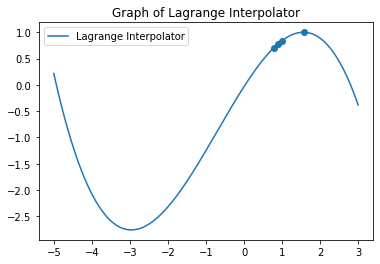

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( -5,3,.001)
plt.scatter(inputValues,outputValues)
plt.plot(x,lagrangeInterpolator(inputValues,outputValues,x))
#plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator'])

plt.show()


In order to apply this to the Lagrange I need to convert the lagrangeInterpolator into an anoynomous function (one that does not need it's arguement to be passed) After much hand wringing, I got it to work with the following simple code and find the first root near 0.

In [ ]:

lint = lambda x: lagrangeInterpolator(inputValues,outputValues,x)
falsePosition(lint,pi/2,-pi/3,20000)

[0.029307164708068996, 0.02930716470806899]

In [ ]:
falsePosition(lint,-3,-5,20000)

[-4.932753991709679, -4.93275399170968]

In [ ]:
falsePosition(lint,3,1,20000)

[2.798688286258208, 2.798688286258207]

None of these provided the precise value but you can see that I have filled the floating point so this is as acurate as I am going to get without using doubles.